In [22]:
def fit_function(data_dir, quantity, fit_range, graph_extension):
    '''Gives the energy of one single spin site
    
    Parameters
    ----------
    data_dir : datafile ~.npz
        contains the 'temperature' 'magnetic_field' 'c_v' 'chi' arrays
    quantity : Str
        string which specifies which physical quantity must be fitted
    fit_range: float
        range around critical temperature (T_c - fit_range, T_c + fit_range)
        which should be evaluated for fit. In case of magnetisation this only
        determines the lower boundary
    graph_extension : float
        defines extra domain to be plotted from xmin and xmax
        Plot domain = (xmin - graph_extension, xmax + graph_extension)
           
    Returns
    -------
    popt: array
        Optimal values for parameters so sum of the squared residuals is minimized
    fit_err: sequence
        Standard deviation of the optimal values for the parameters
    '''
    
    # Initialisation of plot design
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    plt.rc('font', size=16)
    plt.xlabel('$\mathrm{k_B T/J}$')
    
    # Loading data and general functions (and generate transition temperature (T_c))
    from scipy.optimize import curve_fit
    
    data = np.load(data_dir)
    xdata = data['temperature'].reshape(np.shape(data['temperature'])[0])
    ydata = data[quantity][:,0]
    y_err = data[quantity][:,1]
    T_c = 1/(1/2*np.arcsinh(1)) # This is actually 1/(beta_c*J) but as k_B = J = 1 by choice, this is the same
    
    
    # Processing data
    if quantity == 'magnetisation':
        indices = np.where((xdata>=fit_range) & (xdata<T_c))
        from Tijdelijk import f_magnetisation as f
        plt.ylabel('m')
    if quantity == 'c_v':
        indices = np.where((xdata>=T_c-fit_range) & (xdata<T_c+fit_range))
        from Tijdelijk import f_cv as f
        plt.ylabel('$\mathrm{c_v}$')
    if quantity == 'chi':
        indices = np.where((xdata>=T_c-fit_range) & (xdata<T_c+fit_range))
        from Tijdelijk import f_chi as f
        plt.ylabel('$\mathrm{\chi}$')
    
    xdata_domain = xdata[indices]
    ydata_domain = ydata[indices]
    y_err_domain = y_err[indices]
    
    xmax = xdata_domain[0] + graph_extension
    xmin = xdata_domain[np.shape(xdata_domain)[0]-1] - graph_extension
    
    popt, pcov = curve_fit(f, xdata_domain - T_c, ydata_domain, sigma=y_err_domain)
    fit_err = np.sqrt(np.diag(pcov))
    
    plt.figure()
    plt.plot(xdata_domain, f(xdata_domain - T_c, *popt), 'r-')
    plt.errorbar(xdata, ydata, yerr=y_err, fmt='x', markersize=6, capsize=4)
    plt.show()
    
    #plt.figure(xdata, ydata)
    #pl.loglog
    
    return popt, fit_err

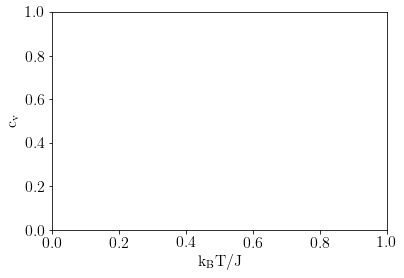

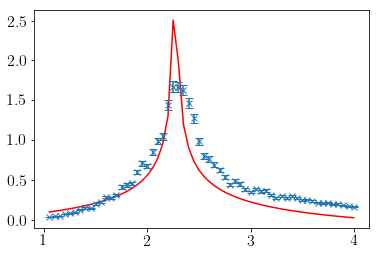

[ 0.58696518  0.40840763 -0.44478133] [ 0.30388281  0.14290565  0.29964187]
(3,)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

#fit_range moet 2 zijn voor magnetisation
popt, fit_err = fit_function('./exported_data/saved_data_SW_1000.npz', 'c_v', 2, 0.2)
print(popt, fit_err)
print(fit_err.shape)